In [1]:
# Imports

import os
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
# Some beautiful colors for the graphs

def color_generator():
    colors = ['#b694fa', # purple
              '#87cefa', # light blue
              '#94faca', # turquoise
              '#f2d9a6', # beige
              '#8cf471', # light green
              '#af002a', # crimson
              '#2b4fe2', # dark blue
              '#e22b8a', # dark pink
              '#6474ed', # blue
              '#f0e58c', # gold
              '#008080', # teal
              '#ffb6e4', # light pink
              '#ff9d5e', # orange
              '#dcdcdc', # gray
              '#693ac1', # dark purple
              ]
    return itertools.cycle(colors)

# Example usage:
gen = color_generator()
# color = next(gen)

In [3]:
variables = {}
all_graphs = ['RNG', 'Urquhart', 'KNN', 'Delaunay', 'd_radius', 'Gabriel', 'Complete']

#-------------------------------------------------------------------------------------------------------------

# Extract the names of the different points sets used
for line in open('variables_needed_for_stats.txt', 'r'):
    if 'selected_points' in line:
        
        # For each set of points, create a dictionary to store the variables
        selected_points = line.split('=')[1].strip()
        variables[str(selected_points).replace('.txt','')] = {}
        
#-------------------------------------------------------------------------------------------------------------

# For each set of points, extract the selected graphs
for line in open('variables_needed_for_stats.txt', 'r'):
    if 'selected_graphs' in line:
        
        for points in variables.keys():
            if points + ' ' in line:
                
                selected_graphs = np.array(list(line.split('=')[1].replace(' ', '').replace('"', '').replace("'", "").replace('[', '').replace("]", "").replace('\n', '').split(',')))
                variables[points]['selected_graphs'] = selected_graphs
        
#-------------------------------------------------------------------------------------------------------------

# Keep only the graphs that are in the selected graphs of every set of points
selected_graphs = []

for graph in all_graphs:
    in_all = True
    
    for points in variables.keys():
        if graph not in variables[points]['selected_graphs']:
            in_all = False
            print(f'{graph} not in {points}')
            
    if in_all:
        selected_graphs.append(graph)
        
#-------------------------------------------------------------------------------------------------------------

# Retrieve the path of the final tour outputed by 2-opt algo
for points in variables.keys():
    for line in open('variables_needed_for_stats.txt', 'r'):
        
        if 'save_2opt_final_graph_html_folder' in line:
            if points in line:
                save_2opt_final_graph_html_folder = line.split('=')[1].strip()
                variables[points]['save_2opt_final_graph_html_folder'] = save_2opt_final_graph_html_folder
                
        if 'save_shortcutting_tour_html_folder' in line:
            if points in line:
                save_shortcutting_tour_html_folder = line.split('=')[1].strip()
                variables[points]['save_shortcutting_tour_html_folder'] = save_shortcutting_tour_html_folder
                
        if 'save_kruskal_html_folder' in line:
            if points in line:
                save_kruskal_html_folder = line.split('=')[1].strip()
                variables[points]['save_kruskal_html_folder'] = save_kruskal_html_folder
                
        if 'save_blossom_html_folder' in line:
            if points in line:
                save_blossom_html_folder = line.split('=')[1].strip()
                variables[points]['save_blossom_html_folder'] = save_blossom_html_folder
                
        if 'save_blossom_matching_html_folder' in line:
            if points in line:
                save_blossom_matching_html_folder = line.split('=')[1].strip()
                variables[points]['save_blossom_matching_html_folder'] = save_blossom_matching_html_folder
                
#-------------------------------------------------------------------------------------------------------------

# Create the folder to save all analysis
if not os.path.exists('ANALYSIS'):
    os.makedirs('ANALYSIS')

RNG not in AC_60
Urquhart not in AC_60
KNN not in AC_60
Delaunay not in AC_60
d_radius not in AC_60
Gabriel not in AC_60


# Quality of the tour

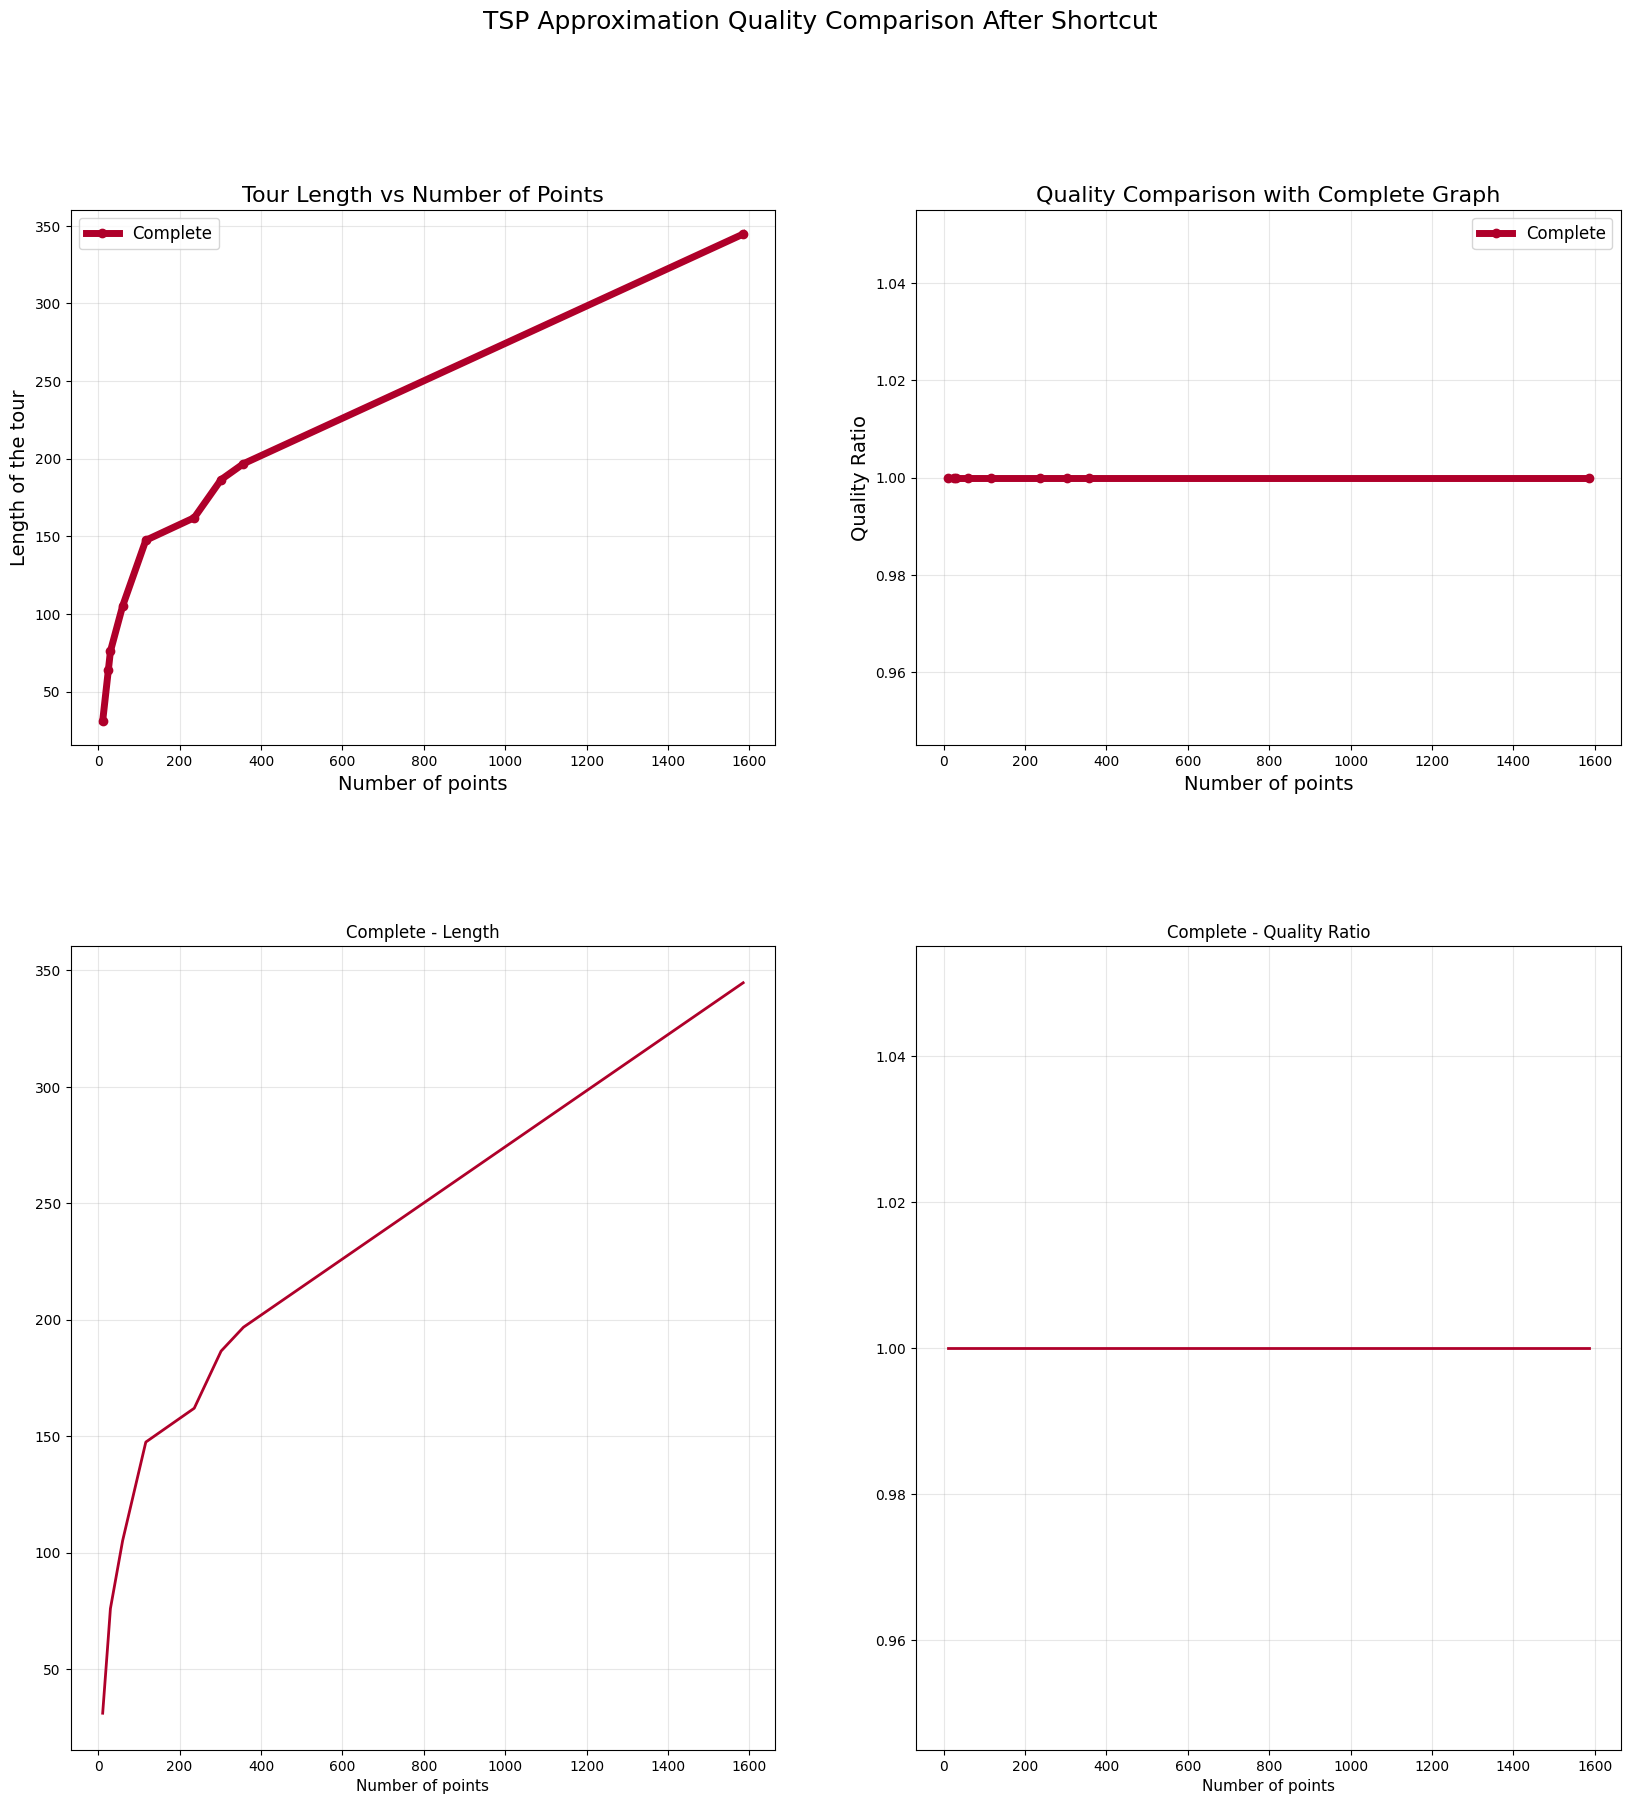

In [4]:
# Graph comparing the quality of the obtained tour in fonction of the number of points for each type of graph

import matplotlib.gridspec as gridspec

def comparison(mode='Shortcut', selected_graphs=selected_graphs, variables=variables):
    # Precompute complete graph values for baseline
    complete_data = {}
    points_list = sorted(variables.keys(), key=lambda x: int(x.split('_')[1]))
    
    for points in points_list:
        nbr_nodes = int(points.split('_')[1])
        if mode == 'Shortcut':
            path = variables[points]['save_shortcutting_tour_html_folder'] + '/' + points + '_complete_shortcutted_circuit.html'
        else:  # mode == '2opt'
            path = variables[points]['save_2opt_final_graph_html_folder'] + '/' + points + '_complete_final_circuit.html'
        
        total = 0
        with open(path, 'r') as f:
            for line in f:
                if 'Accepted edge' in line:
                    length = float(line.split(':')[-1].replace('\n', '').replace(' ', '').replace('</li>', ''))
                    total += length
        complete_data[points] = total

    # Collect data for all graph types
    data = {}
    selected_graphs = ['Complete'] + [g for g in selected_graphs if g != 'Complete']
    
    for graph in selected_graphs:
        data[graph] = {'x': [], 'y_length': [], 'y_quality': []}
        for points in points_list:
            nbr_nodes = int(points.split('_')[1])
            
            if graph != 'Complete':
                if mode == 'Shortcut':
                    path = variables[points]['save_shortcutting_tour_html_folder'] + '/' + points + '_' + graph.lower() + '_shortcutted_circuit.html'
                else:  # mode == '2opt'
                    path = variables[points]['save_2opt_final_graph_html_folder'] + '/' + points + '_' + graph.lower() + '_final_circuit.html'
                
                total = 0
                with open(path, 'r') as f:
                    for line in f:
                        if 'Accepted edge' in line:
                            length = float(line.split(':')[-1].replace('\n', '').replace(' ', '').replace('</li>', ''))
                            total += length
                quality = total / complete_data[points]
            else:
                total = complete_data[points]
                quality = 1.0  # Complete graph is reference
            
            data[graph]['x'].append(nbr_nodes)
            data[graph]['y_length'].append(total)
            data[graph]['y_quality'].append(quality)

    # Color setup
    gen = color_generator()
    colors = {}
    for graph in selected_graphs:
        color = next(gen)
        if graph == 'Complete':
            colors[graph] = '#af002a'  # Crimson for complete
        else:
            # Ensure non-complete graphs don't get crimson
            colors[graph] = next(gen) if color == '#af002a' else color

    # Create figure with 2x2 grid layout
    fig = plt.figure(figsize=(20, 20))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5], width_ratios=[1, 1], 
                          hspace=0.3, wspace=0.2)
    
    # Top row: Combined plots
    # [0,0] - All curves for length
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title('Tour Length vs Number of Points', fontsize=16)
    ax1.set_xlabel('Number of points', fontsize=14)
    ax1.set_ylabel('Length of the tour', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # [0,1] - All curves for quality comparison
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title('Quality Comparison with Complete Graph', fontsize=16)
    ax2.set_xlabel('Number of points', fontsize=14)
    ax2.set_ylabel('Quality Ratio', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Plot all graphs on main plots
    for graph in selected_graphs:
        lw = 5 if graph == 'Complete' else 2
        ax1.plot(data[graph]['x'], data[graph]['y_length'], label=graph, 
                color=colors[graph], marker='o', linewidth=lw)
        ax2.plot(data[graph]['x'], data[graph]['y_quality'], label=graph, 
                color=colors[graph], marker='o', linewidth=lw)
    
    ax1.legend(fontsize=12, loc='best')
    ax2.legend(fontsize=12, loc='best')
    
    # Bottom row: Individual plots
    # [1,0] - All individual length plots
    gs_bottom_left = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 1, 
                                                    subplot_spec=gs[1, 0], 
                                                    hspace=0.4)
    
    # [1,1] - All individual quality plots
    gs_bottom_right = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 1, 
                                                     subplot_spec=gs[1, 1], 
                                                     hspace=0.4)
    
    # Create individual length plots
    for i, graph in enumerate(selected_graphs):
        ax_len = fig.add_subplot(gs_bottom_left[i])
        ax_len.plot(data[graph]['x'], data[graph]['y_length'], 
                  color=colors[graph], linewidth=2)
        ax_len.set_title(f'{graph} - Length', fontsize=12)
        ax_len.grid(True, alpha=0.3)
        ax_len.tick_params(labelsize=10)
        
        # Only add x-label to bottom plot
        if i == len(selected_graphs) - 1:
            ax_len.set_xlabel('Number of points', fontsize=11)
        else:
            ax_len.set_xticklabels([])
    
    # Create individual quality plots
    for i, graph in enumerate(selected_graphs):
        ax_qual = fig.add_subplot(gs_bottom_right[i])
        ax_qual.plot(data[graph]['x'], data[graph]['y_quality'], 
                   color=colors[graph], linewidth=2)
        ax_qual.set_title(f'{graph} - Quality Ratio', fontsize=12)
        ax_qual.grid(True, alpha=0.3)
        ax_qual.tick_params(labelsize=10)
        
        # Only add x-label to bottom plot
        if i == len(selected_graphs) - 1:
            ax_qual.set_xlabel('Number of points', fontsize=11)
        else:
            ax_qual.set_xticklabels([])

    # Final adjustments
    plt.suptitle(f'TSP Approximation Quality Comparison After {mode}', fontsize=18, y=0.98)
    plt.savefig(f'ANALYSIS/length_comparison_{mode}.pdf', dpi=300)
    plt.show()

# Execute the function
comparison('Shortcut', selected_graphs, variables)

# Kruskal iteration

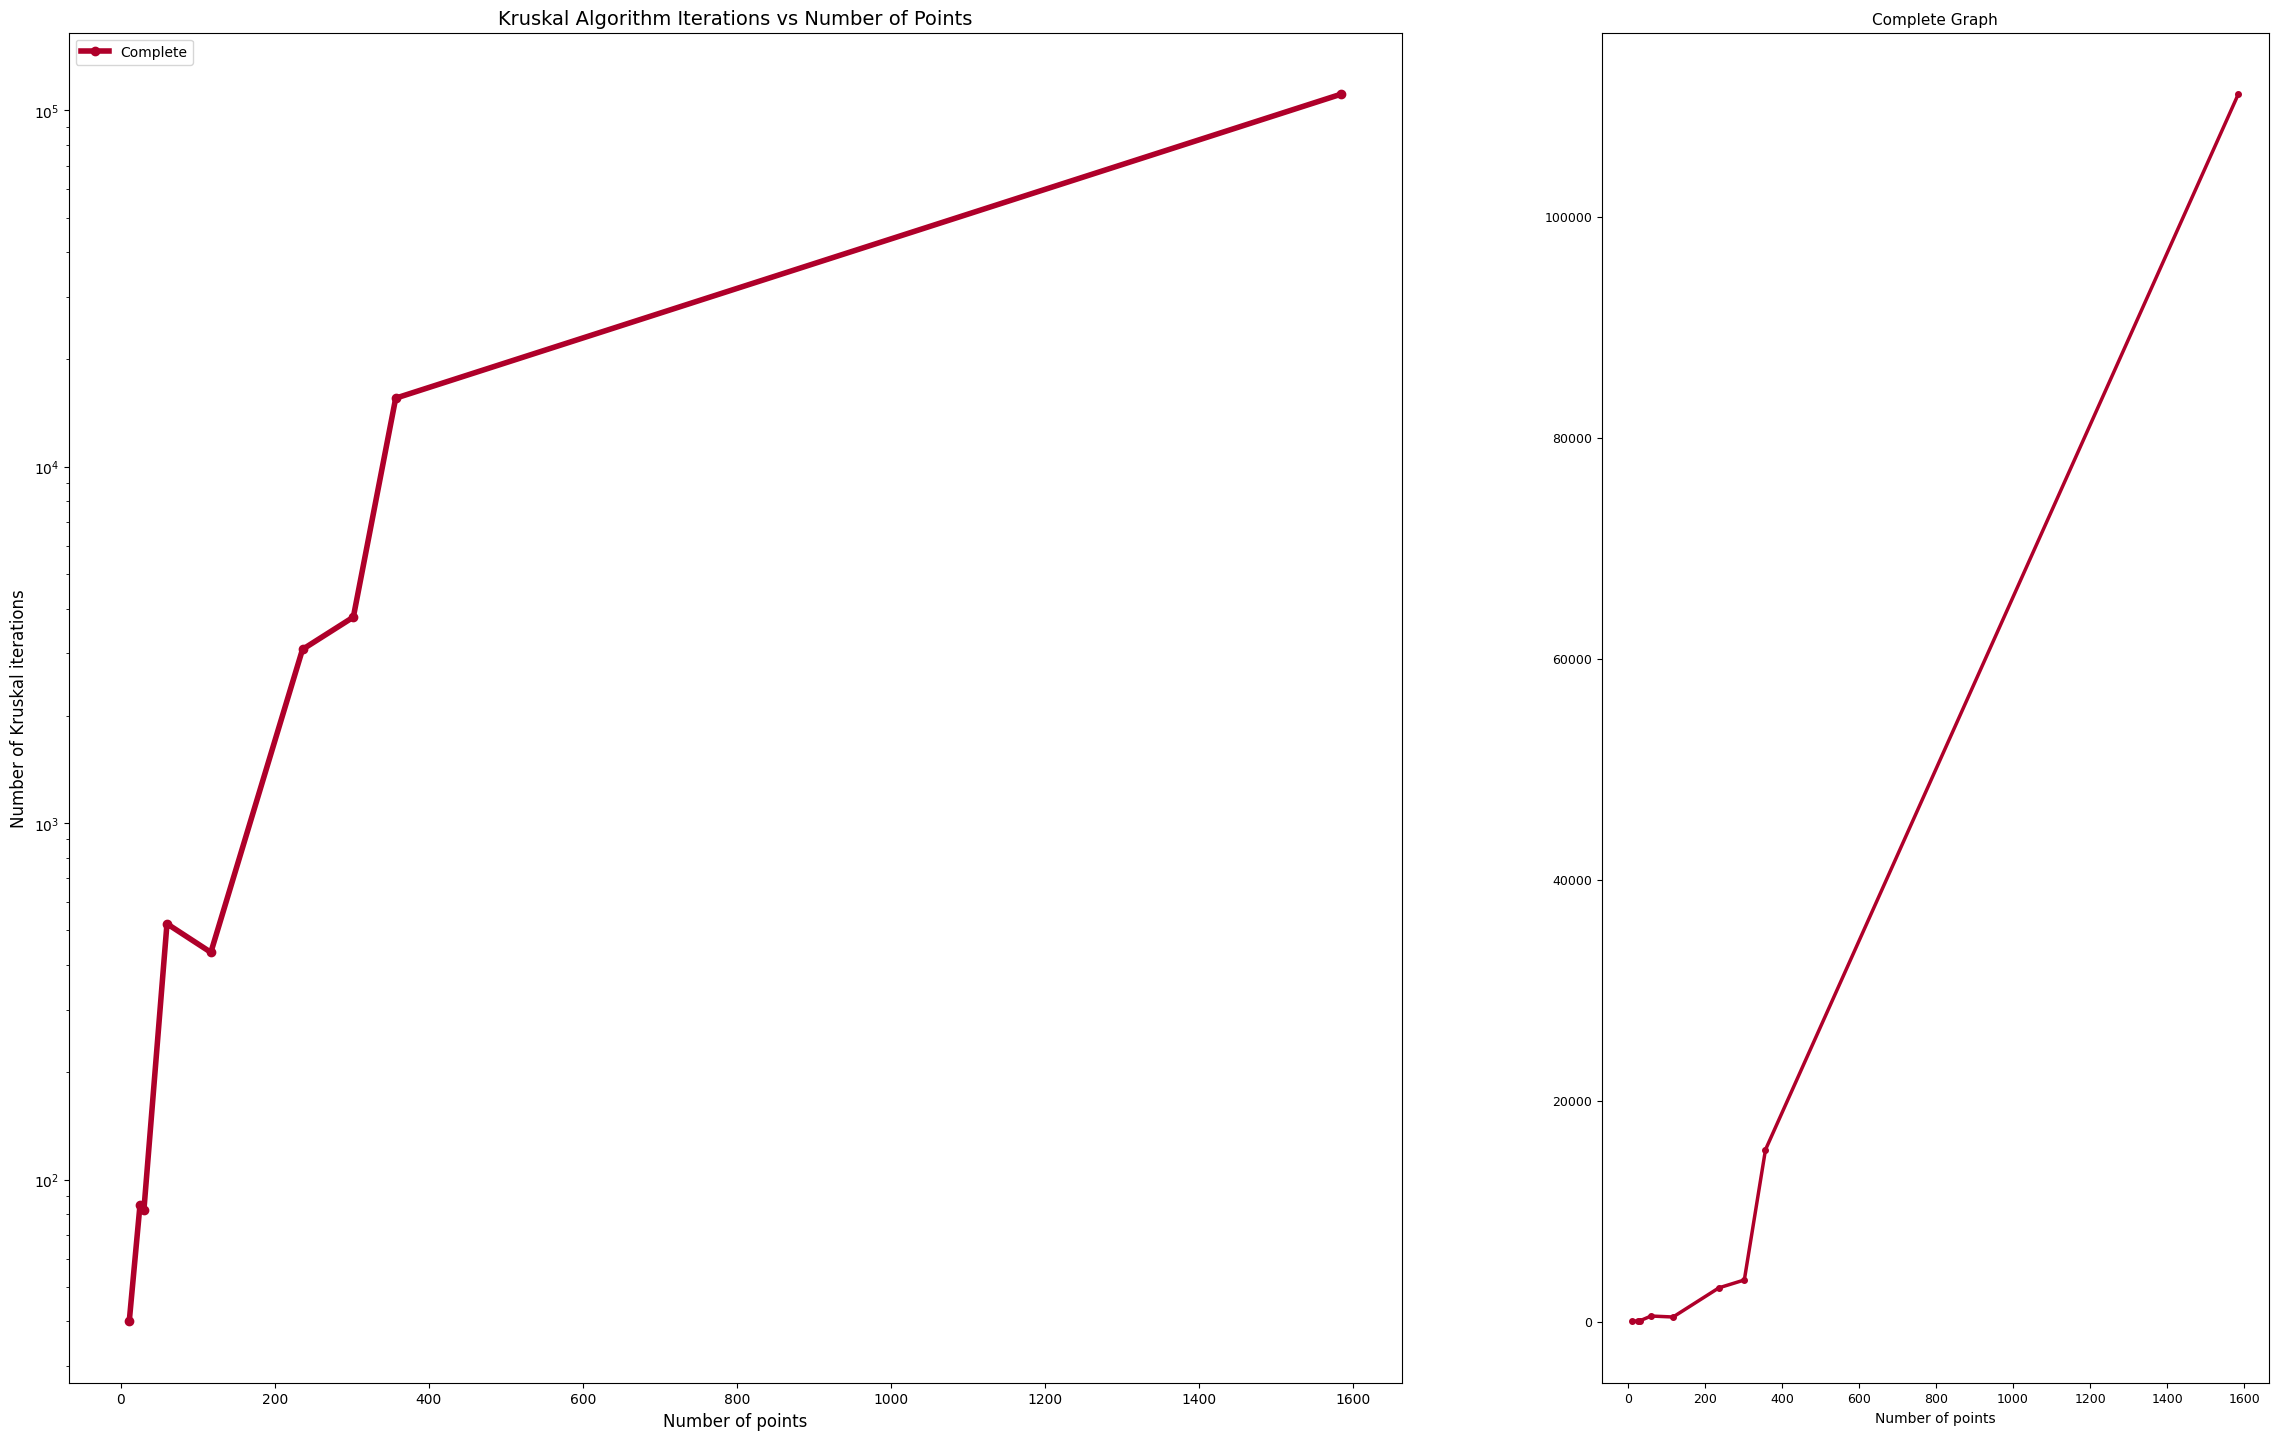

In [5]:
# Graph comparing the number of iterations of the Kruskal algorithm in function of the number of points for each type of graph

def kruskal_iterations(selected_graphs=selected_graphs, variables=variables):
    # Precompute data for all graphs
    data = {}
    points_list = sorted(variables.keys(), key=lambda x: int(x.split('_')[1]))
    selected_graphs = ['Complete'] + [g for g in selected_graphs if g != 'Complete']
    
    # Collect iteration data
    for graph in selected_graphs:
        data[graph] = {'x': [], 'y': []}
        for points in points_list:
            nbr_nodes = int(points.split('_')[1])
            path = variables[points]['save_kruskal_html_folder'] + '/' + points + '_' + graph.lower() + '.html'
            
            iterations = 0
            with open(path, 'r') as f:
                for line in f:
                    if 'Step' in line:
                        iterations += 1
            
            data[graph]['x'].append(nbr_nodes)
            data[graph]['y'].append(iterations)

    # Color setup
    gen = color_generator()
    colors = {}
    for graph in selected_graphs:
        color = next(gen)
        if graph == 'Complete':
            colors[graph] = '#af002a'  # Crimson for complete
        else:
            # Ensure non-complete graphs don't get crimson
            colors[graph] = next(gen) if color == '#af002a' else color

    # Create figure with custom layout
    fig = plt.figure(figsize=(25, 15))
    gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], figure=fig)
    
    # Main plot area
    ax_main = fig.add_subplot(gs[0])
    
    # Mini plots area - one row per graph
    gs_mini = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 1, 
                                             subplot_spec=gs[1], hspace=0.4)
    
    # Configure main plot
    ax_main.set_xlabel('Number of points', fontsize=12)
    ax_main.set_ylabel('Number of Kruskal iterations', fontsize=12)
    ax_main.set_title('Kruskal Algorithm Iterations vs Number of Points', fontsize=14)
    # ax_main.grid(True)
    ax_main.set_yscale('log')  # Keep logarithmic scale
    
    # Plot all graphs on main plot
    for graph in selected_graphs:
        lw = 4 if graph == 'Complete' else 2
        ax_main.plot(data[graph]['x'], data[graph]['y'], 
                   label=graph, color=colors[graph], 
                   marker='o', linewidth=lw)
    
    ax_main.legend(fontsize=10, loc='upper left')

    # Create mini plots
    for i, graph in enumerate(selected_graphs):
        ax_mini = fig.add_subplot(gs_mini[i])
        ax_mini.plot(data[graph]['x'], data[graph]['y'], 
                    color=colors[graph], linewidth=2.5, marker='o', markersize=4)
        
        # Format mini plot
        ax_mini.set_title(f'{graph} Graph', fontsize=11)
        # ax_mini.grid(True)
        ax_mini.tick_params(labelsize=9)
        
        # Only show x-label for bottom mini plot
        if i == len(selected_graphs) - 1:
            ax_mini.set_xlabel('Number of points', fontsize=10)
        else:
            ax_mini.set_xticklabels([])

    # Final adjustments
    plt.subplots_adjust(top=0.95, bottom=0.05, left=0.07, right=0.95)
    plt.savefig('ANALYSIS/kruskal_iterations_comparison_enhanced.pdf', dpi=300)
    plt.show()

# Call the function
kruskal_iterations(selected_graphs, variables)

# Blossom matching quality

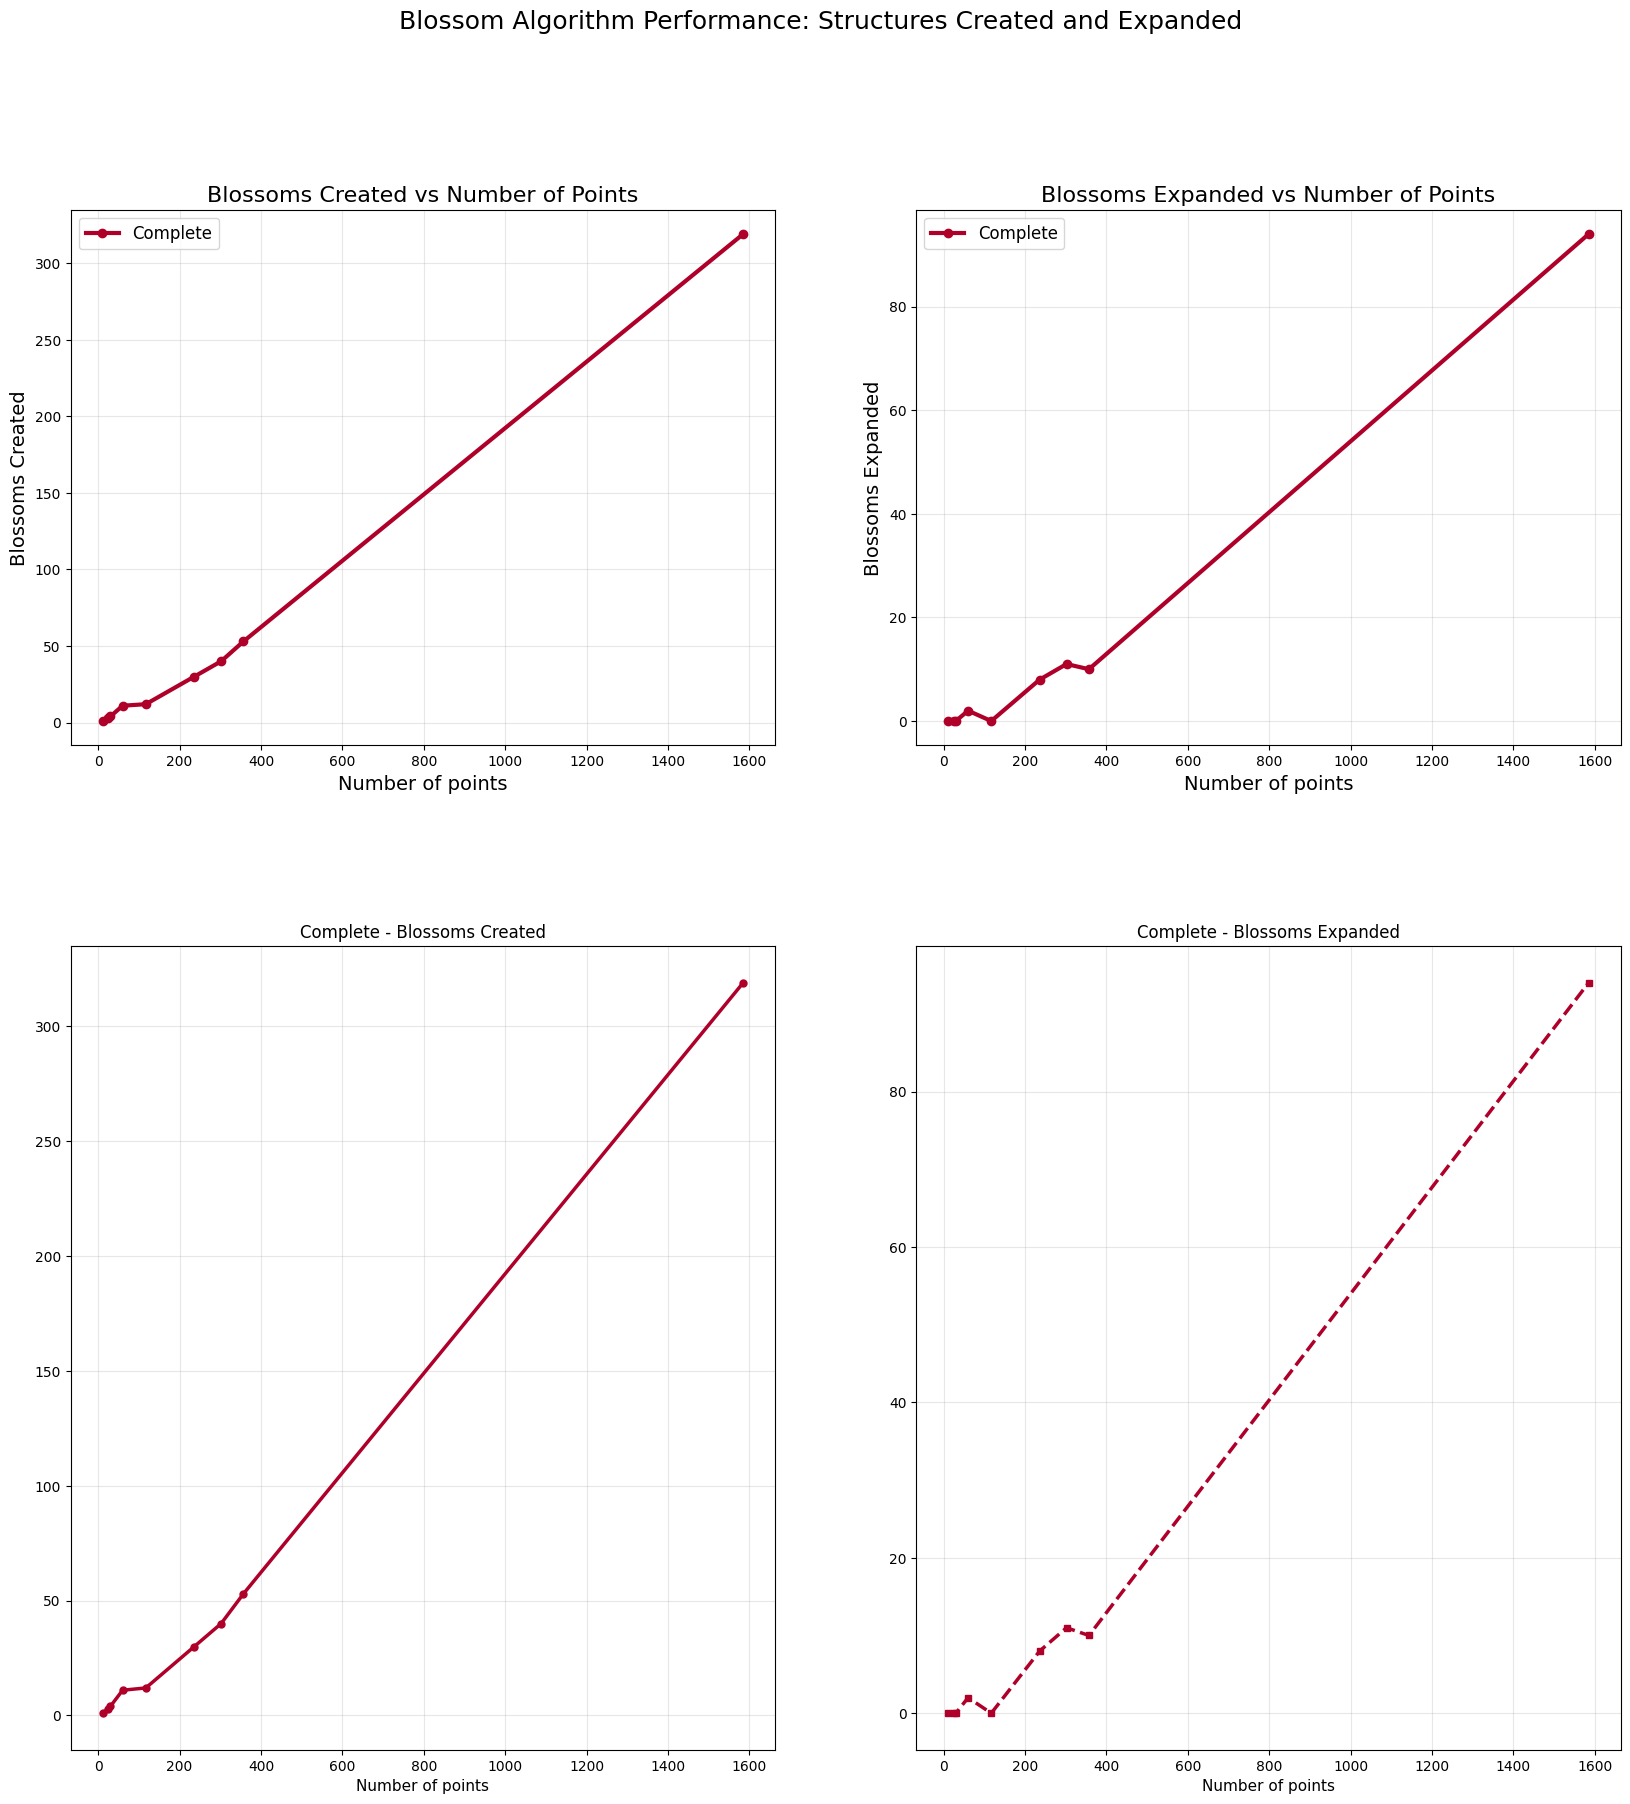

In [6]:
# Graph comparing the number of blossom structures created and expanded in the blossom algorithm in function of the number of points for each type of graph

def blossom_comparison(selected_graphs=selected_graphs, variables=variables):
    # Precompute data for all graphs
    data = {}
    points_list = sorted(variables.keys(), key=lambda x: int(x.split('_')[1]))
    selected_graphs = ['Complete'] + [g for g in selected_graphs if g != 'Complete']
    
    # Collect blossom data
    for graph in selected_graphs:
        data[graph] = {'x': [], 'created': [], 'expanded': []}
        for points in points_list:
            nbr_nodes = int(points.split('_')[1])
            path = variables[points]['save_blossom_html_folder'] + '/' + points + '_' + graph.lower() + '.html'
            
            total_created = 0
            total_expanded = 0
            
            with open(path, 'r') as f:
                for line in f:
                    if 'BLOSSOM CREATED' in line:
                        total_created += 1
                    if 'BLOSSOM EXPANSION' in line:
                        total_expanded += 1
            
            data[graph]['x'].append(nbr_nodes)
            data[graph]['created'].append(total_created)
            data[graph]['expanded'].append(total_expanded)

    # Color setup
    gen = color_generator()
    colors = {}
    for graph in selected_graphs:
        color = next(gen)
        if graph == 'Complete':
            colors[graph] = '#af002a'  # Crimson for complete
        else:
            # Ensure non-complete graphs don't get crimson
            colors[graph] = next(gen) if color == '#af002a' else color

    # Create figure with 2x2 grid layout
    fig = plt.figure(figsize=(20, 20))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5], width_ratios=[1, 1], 
                          hspace=0.3, wspace=0.2)
    
    # Top row: Combined plots
    # [0,0] - All curves for blossoms created
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title('Blossoms Created vs Number of Points', fontsize=16)
    ax1.set_xlabel('Number of points', fontsize=14)
    ax1.set_ylabel('Blossoms Created', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # [0,1] - All curves for blossoms expanded
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title('Blossoms Expanded vs Number of Points', fontsize=16)
    ax2.set_xlabel('Number of points', fontsize=14)
    ax2.set_ylabel('Blossoms Expanded', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Plot all graphs on main plots
    for graph in selected_graphs:
        lw = 3 if graph == 'Complete' else 2
        ax1.plot(data[graph]['x'], data[graph]['created'], 
                label=graph, color=colors[graph], 
                marker='o', linewidth=lw)
        ax2.plot(data[graph]['x'], data[graph]['expanded'], 
                label=graph, color=colors[graph], 
                marker='o', linewidth=lw)
    
    ax1.legend(fontsize=12, loc='best')
    ax2.legend(fontsize=12, loc='best')
    
    # Bottom row: Individual plots
    # [1,0] - All individual created blossom plots
    gs_bottom_left = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 1, 
                                                    subplot_spec=gs[1, 0], 
                                                    hspace=0.4)
    
    # [1,1] - All individual expanded blossom plots
    gs_bottom_right = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 1, 
                                                     subplot_spec=gs[1, 1], 
                                                     hspace=0.4)
    
    # Create individual created blossom plots
    for i, graph in enumerate(selected_graphs):
        ax_created = fig.add_subplot(gs_bottom_left[i])
        ax_created.plot(data[graph]['x'], data[graph]['created'], 
                      color=colors[graph], linewidth=2.5, 
                      marker='o', markersize=5)
        ax_created.set_title(f'{graph} - Blossoms Created', fontsize=12)
        ax_created.grid(True, alpha=0.3)
        ax_created.tick_params(labelsize=10)
        
        # Only add x-label to bottom plot
        if i == len(selected_graphs) - 1:
            ax_created.set_xlabel('Number of points', fontsize=11)
        else:
            ax_created.set_xticklabels([])
    
    # Create individual expanded blossom plots
    for i, graph in enumerate(selected_graphs):
        ax_expanded = fig.add_subplot(gs_bottom_right[i])
        ax_expanded.plot(data[graph]['x'], data[graph]['expanded'], 
                       color=colors[graph], linewidth=2.5, 
                       marker='s', markersize=5, linestyle='--')
        ax_expanded.set_title(f'{graph} - Blossoms Expanded', fontsize=12)
        ax_expanded.grid(True, alpha=0.3)
        ax_expanded.tick_params(labelsize=10)
        
        # Only add x-label to bottom plot
        if i == len(selected_graphs) - 1:
            ax_expanded.set_xlabel('Number of points', fontsize=11)
        else:
            ax_expanded.set_xticklabels([])

    # Final adjustments
    plt.suptitle('Blossom Algorithm Performance: Structures Created and Expanded', fontsize=18, y=0.98)
    plt.savefig('ANALYSIS/blossom_comparison.pdf', dpi=300)
    plt.show()

# Call the function
blossom_comparison(selected_graphs, variables)

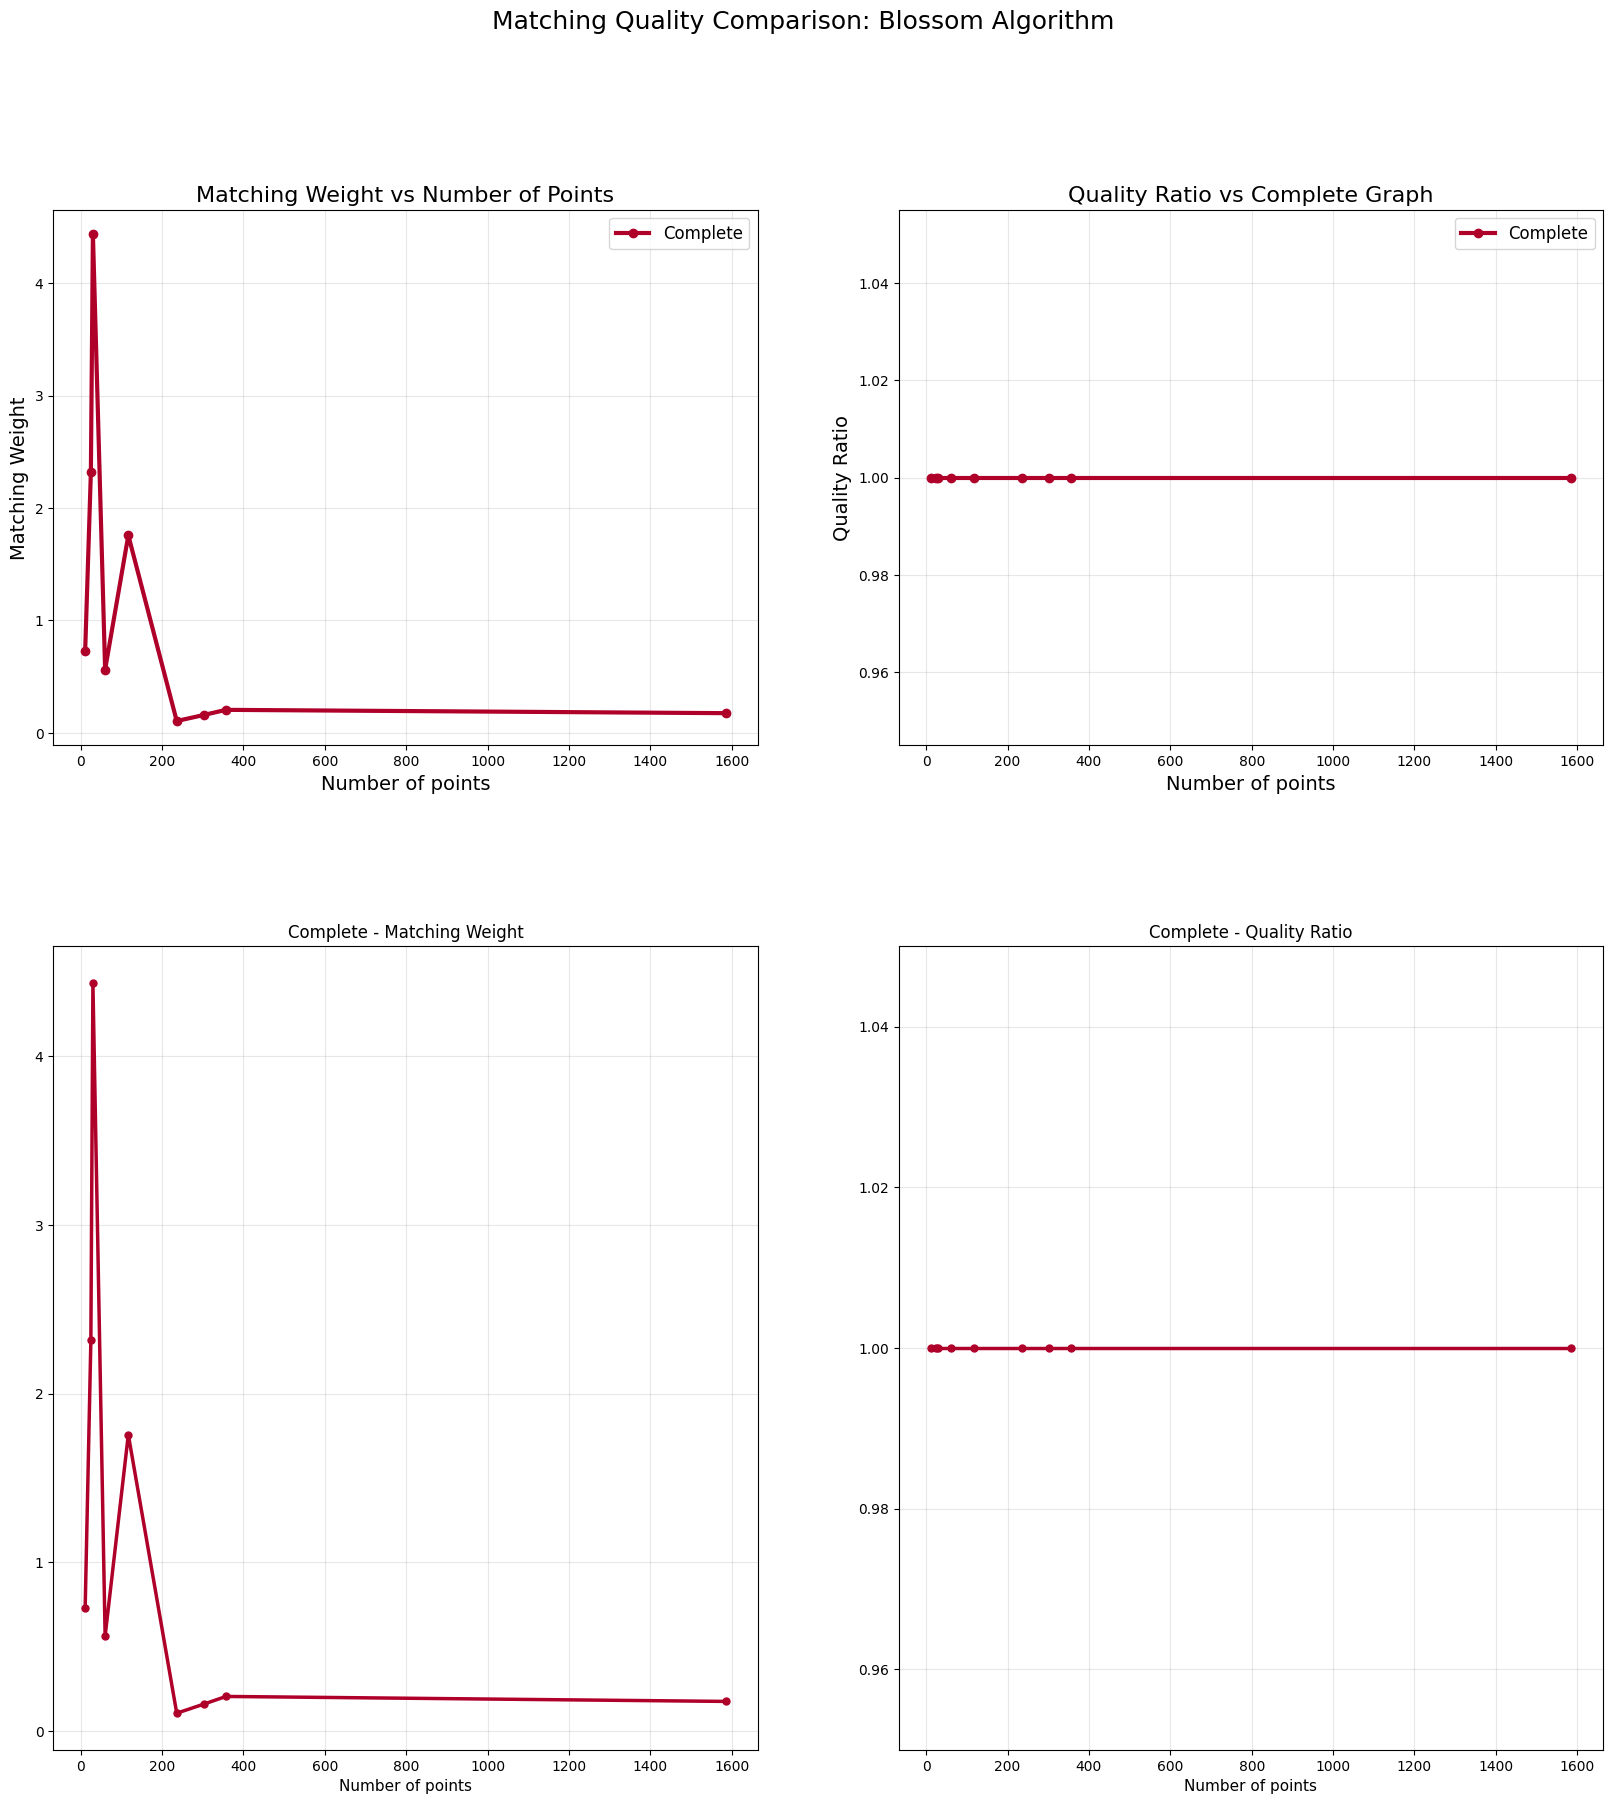

In [7]:
# Graph comparing the quality of the matching obtained by the blossom algorithm in function of the number of points for each type of graph

def compare_matching(selected_graphs=selected_graphs, variables=variables):
    # Precompute complete graph values for baseline
    complete_data = {}
    points_list = sorted(variables.keys(), key=lambda x: int(x.split('_')[1]))
    
    for points in points_list:
        nbr_nodes = int(points.split('_')[1])
        path = variables[points]['save_blossom_matching_html_folder'] + '/' + points + '_complete_matching.html'
        
        total = 0
        with open(path, 'r') as f:
            for line in f:
                if 'Kruskal' in line:
                    total = float(line.split(':')[-1].replace('\n', '').replace(' ', '').replace('</li>', ''))
        complete_data[points] = total

    # Collect data for all graph types
    data = {}
    selected_graphs = ['Complete'] + [g for g in selected_graphs if g != 'Complete']
    
    for graph in selected_graphs:
        data[graph] = {'x': [], 'weight': [], 'ratio': []}
        for points in points_list:
            nbr_nodes = int(points.split('_')[1])
            
            if graph != 'Complete':
                path = variables[points]['save_blossom_matching_html_folder'] + '/' + points + '_' + graph.lower() + '_matching.html'
                total = 0
                with open(path, 'r') as f:
                    for line in f:
                        if 'Kruskal' in line:
                            total = float(line.split(':')[-1].replace('\n', '').replace(' ', '').replace('</li>', ''))
                ratio = total / complete_data[points]
            else:
                total = complete_data[points]
                ratio = 1.0
                
            data[graph]['x'].append(nbr_nodes)
            data[graph]['weight'].append(total)
            data[graph]['ratio'].append(ratio)

    # Color setup
    gen = color_generator()
    colors = {}
    for graph in selected_graphs:
        color = next(gen)
        if graph == 'Complete':
            colors[graph] = '#af002a'  # Crimson for complete
        else:
            # Ensure non-complete graphs don't get crimson
            colors[graph] = next(gen) if color == '#af002a' else color

    # Create figure with 2x2 grid layout
    fig = plt.figure(figsize=(20, 20))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.5], width_ratios=[1, 1], 
                          hspace=0.3, wspace=0.2)
    
    # Top row: Combined plots
    # [0,0] - All curves for matching weight
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.set_title('Matching Weight vs Number of Points', fontsize=16)
    ax1.set_xlabel('Number of points', fontsize=14)
    ax1.set_ylabel('Matching Weight', fontsize=14)
    ax1.grid(True, alpha=0.3)
    
    # [0,1] - All curves for quality ratio
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.set_title('Quality Ratio vs Complete Graph', fontsize=16)
    ax2.set_xlabel('Number of points', fontsize=14)
    ax2.set_ylabel('Quality Ratio', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Plot all graphs on main plots
    for graph in selected_graphs:
        lw = 3 if graph == 'Complete' else 2
        ax1.plot(data[graph]['x'], data[graph]['weight'], 
                label=graph, color=colors[graph], 
                marker='o', linewidth=lw)
        ax2.plot(data[graph]['x'], data[graph]['ratio'], 
                label=graph, color=colors[graph], 
                marker='o', linewidth=lw)
    
    ax1.legend(fontsize=12, loc='best')
    ax2.legend(fontsize=12, loc='best')
    
    # Bottom row: Individual plots
    # [1,0] - All individual matching weight plots
    gs_bottom_left = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 1, 
                                                    subplot_spec=gs[1, 0], 
                                                    hspace=0.4)
    
    # [1,1] - All individual quality ratio plots
    gs_bottom_right = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 1, 
                                                     subplot_spec=gs[1, 1], 
                                                     hspace=0.4)
    
    # Create individual matching weight plots
    for i, graph in enumerate(selected_graphs):
        ax_weight = fig.add_subplot(gs_bottom_left[i])
        ax_weight.plot(data[graph]['x'], data[graph]['weight'], 
                     color=colors[graph], linewidth=2.5, 
                     marker='o', markersize=5)
        ax_weight.set_title(f'{graph} - Matching Weight', fontsize=12)
        ax_weight.grid(True, alpha=0.3)
        ax_weight.tick_params(labelsize=10)
        
        # Only add x-label to bottom plot
        if i == len(selected_graphs) - 1:
            ax_weight.set_xlabel('Number of points', fontsize=11)
        else:
            ax_weight.set_xticklabels([])
    
    # Create individual quality ratio plots
    for i, graph in enumerate(selected_graphs):
        ax_ratio = fig.add_subplot(gs_bottom_right[i])
        ax_ratio.plot(data[graph]['x'], data[graph]['ratio'], 
                    color=colors[graph], linewidth=2.5, 
                    marker='o', markersize=5)
        ax_ratio.set_title(f'{graph} - Quality Ratio', fontsize=12)
        ax_ratio.grid(True, alpha=0.3)
        ax_ratio.tick_params(labelsize=10)
        
        # Set y-axis limits for ratio plots
        if graph != 'Complete':
            # Add 10% padding above the max ratio value
            max_ratio = max(data[graph]['ratio'])
            ax_ratio.set_ylim(0, max_ratio * 1.10)
        else:
            # Complete graph ratio should always be 1.0
            ax_ratio.set_ylim(0.95, 1.05)
        
        # Only add x-label to bottom plot
        if i == len(selected_graphs) - 1:
            ax_ratio.set_xlabel('Number of points', fontsize=11)
        else:
            ax_ratio.set_xticklabels([])

    # Final adjustments
    plt.suptitle('Matching Quality Comparison: Blossom Algorithm', fontsize=18, y=0.98)
    plt.savefig('ANALYSIS/matching_quality_comparison.pdf', dpi=300)
    plt.show()

# Call the function
compare_matching(selected_graphs, variables)

In [ ]:
# Graphs comparing the quality of the matching after every stage in the blossom algorithm for each type of graph for a given number of points

def compare_matching_stages(selected_graphs=selected_graphs, variables=variables):
    if not os.path.exists('ANALYSIS/STAGES_ANALYSIS'):
        os.makedirs('ANALYSIS/STAGES_ANALYSIS')
    
    selected_graphs = ['Complete'] + [g for g in selected_graphs if g != 'Complete']
    
    # Color setup
    gen = color_generator()
    colors = {}
    for graph in selected_graphs:
        color = next(gen)
        if graph == 'Complete':
            colors[graph] = '#af002a'  # Crimson for complete
        else:
            colors[graph] = next(gen) if color == '#af002a' else color

    # Process each point set
    for points in sorted(variables.keys(), key=lambda x: int(x.split('_')[1])):
        # Create figure with custom layout
        fig = plt.figure(figsize=(60, 15))
        gs_main = gridspec.GridSpec(1, 2, width_ratios=[2, 1], figure=fig)
        gs_left = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs_main[0], wspace=0.3)
        gs_right = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 2, subplot_spec=gs_main[1], hspace=0.5)

        # Main plots (left side)
        ax1 = fig.add_subplot(gs_left[0])
        ax2 = fig.add_subplot(gs_left[1])
        
        # Configure main plots
        ax1.set_xlabel('Stage', fontsize=12)
        ax1.set_ylabel('Matching Weight', fontsize=12)
        ax1.set_title(f'Matching Weight Evolution - {points}', fontsize=14)
        # ax1.grid(True)
        
        ax2.set_xlabel('Stage', fontsize=12)
        ax2.set_ylabel('Quality Ratio', fontsize=12)
        ax2.set_title(f'Quality Ratio Evolution - {points}', fontsize=14)
        # ax2.grid(True)
        
        complete_data = []
        graph_stages = {}
        
        # Process each graph type
        for graph in selected_graphs:
            path = variables[points]['save_blossom_html_folder'] + '/' + points + '_' + graph.lower() + '.html'
            
            with open(path, 'r') as f:
                lines = f.readlines()
                
            # Find all stage markers
            stage_lines = [line for line in lines if 'after stage' in line]
            stage_count = len(stage_lines) - 1  # Ignore last duplicate stage
            
            stages = []
            weights = []
            ratios = []
            
            # Process each stage
            for stage_num in range(1, stage_count + 1):
                stage_line = [line for line in lines if f'after stage {stage_num}' in line][0]
                stage_idx = lines.index(stage_line)
                matching_lines = lines[stage_idx + 1 : stage_idx + 1 + 2 * stage_num]
                
                total = 0
                for line in matching_lines:
                    total += float(line.split(':')[-1].replace('\n', '').replace(' ', '').replace('</li>', ''))
                total /= 2  # Each edge counted twice
                
                stages.append(stage_num)
                weights.append(total)
                
                # For complete graph, store as baseline
                if graph == 'Complete':
                    complete_data.append(total)
                    ratios.append(1.0)
                else:
                    ratios.append(total / complete_data[stage_num - 1])
            
            graph_stages[graph] = {
                'stages': stages,
                'weights': weights,
                'ratios': ratios
            }
            
            # Plot to main graphs
            lw = 4 if graph == 'Complete' else 2
            ax1.plot(stages, weights, label=graph, color=colors[graph], 
                    marker='o', linewidth=lw)
            ax2.plot(stages, ratios, label=graph, color=colors[graph], 
                    marker='o', linewidth=lw)
        
        # Set stage ticks on main plots
        max_stage = max(len(graph_stages[g]['stages']) for g in selected_graphs)
        ax1.set_xticks(range(1, max_stage + 1))
        ax2.set_xticks(range(1, max_stage + 1))
        ax1.legend(fontsize=10)
        ax2.legend(fontsize=10)
        
        # Create mini plots (right side) - one row per graph, two columns
        for i, graph in enumerate(selected_graphs):
            stages = graph_stages[graph]['stages']
            weights = graph_stages[graph]['weights']
            ratios = graph_stages[graph]['ratios']
            
            # Weight mini plot
            ax_weight = fig.add_subplot(gs_right[i, 0])
            ax_weight.plot(stages, weights, color=colors[graph], 
                         marker='o', linewidth=2.5)
            ax_weight.set_title(f'{graph} - Weight', fontsize=12)
            # ax_weight.grid(True)
            ax_weight.set_xticks(stages)
            ax_weight.tick_params(labelsize=9)
            
            # Ratio mini plot
            ax_ratio = fig.add_subplot(gs_right[i, 1])
            ax_ratio.plot(stages, ratios, color=colors[graph], 
                        marker='o', linewidth=2.5)
            ax_ratio.set_title(f'{graph} - Ratio', fontsize=12)
            # ax_ratio.grid(True)
            ax_ratio.set_xticks(stages)
            ax_ratio.tick_params(labelsize=9)
            
            # Only show x-labels for bottom row
            if i == len(selected_graphs) - 1:
                ax_weight.set_xlabel('Stage', fontsize=10)
                ax_ratio.set_xlabel('Stage', fontsize=10)
            else:
                ax_weight.set_xticklabels([])
                ax_ratio.set_xticklabels([])
        
        # Final adjustments
        plt.tight_layout()
        plt.subplots_adjust(top=0.95, bottom=0.05)
        plt.savefig(f'ANALYSIS/STAGES_ANALYSIS/matching_stages_enhanced_{points}.png', dpi=300)
        plt.close(fig)  # Close figure to free memory

# Call the function
compare_matching_stages(selected_graphs, variables)

In [ ]:
# Graph comparing the number of edges accepted, rejected and not seen in the Kruskal algorithm used in the blossom algorithm in function of the number of points for each type of graph

def kruskal_edges_comparison(selected_graphs=selected_graphs, variables=variables):
    # Precompute data for all graphs
    data = {}
    points_list = sorted(variables.keys(), key=lambda x: int(x.split('_')[1]))
    selected_graphs = ['Complete'] + [g for g in selected_graphs if g != 'Complete']
    
    # Collect edge data
    for graph in selected_graphs:
        data[graph] = {'x': [], 'accepted': [], 'rejected': [], 'not_seen': []}
        for points in points_list:
            nbr_nodes = int(points.split('_')[1])
            path = variables[points]['save_blossom_matching_html_folder'] + '/' + points + '_' + graph.lower() + '_matching.html'
            
            accepted = 0
            rejected = 0
            not_seen = 0
            
            with open(path, 'r') as f:
                for line in f:
                    if 'Accepted' in line:
                        accepted += 1
                    elif 'Rejected' in line:
                        rejected += 1
                    elif 'Not seen' in line:
                        not_seen += 1
            
            data[graph]['x'].append(nbr_nodes)
            data[graph]['accepted'].append(accepted)
            data[graph]['rejected'].append(rejected)
            data[graph]['not_seen'].append(not_seen)

    # Color setup
    gen = color_generator()
    colors = {}
    for graph in selected_graphs:
        color = next(gen)
        if graph == 'Complete':
            colors[graph] = '#af002a'  # Crimson for complete
        else:
            colors[graph] = next(gen) if color == '#af002a' else color

    # Create figure with custom layout
    fig = plt.figure(figsize=(40, 40))
    gs_main = gridspec.GridSpec(2, 1, height_ratios=[1, 0.6], figure=fig)
    
    # Create 2x3 grid for main plots (2 rows, 3 columns)
    gs_left = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=gs_main[0], wspace=0.25, hspace=0.3)
    
    # Create grid for mini plots (right side)
    gs_right = gridspec.GridSpecFromSubplotSpec(len(selected_graphs), 3, subplot_spec=gs_main[1], hspace=0.5)

    # Create subplots for left side (6 plots)
    # First row: Counts
    ax_accepted_count = fig.add_subplot(gs_left[0, 0])
    ax_rejected_count = fig.add_subplot(gs_left[0, 1])
    ax_not_seen_count = fig.add_subplot(gs_left[0, 2])
    
    # Second row: Ratios
    ax_accepted_ratio = fig.add_subplot(gs_left[1, 0])
    ax_rejected_ratio = fig.add_subplot(gs_left[1, 1])
    ax_not_seen_ratio = fig.add_subplot(gs_left[1, 2])
    
    # Configure count plots
    for ax, title in zip([ax_accepted_count, ax_rejected_count, ax_not_seen_count],
                         ['Accepted Edges', 'Rejected Edges', 'Not Seen Edges']):
        ax.set_xlabel('Number of points', fontsize=14)
        ax.set_ylabel('Count', fontsize=14)
        ax.set_title(title + ' Count', fontsize=16)
        # ax.grid(True)
    
    # Configure ratio plots
    for ax, title in zip([ax_accepted_ratio, ax_rejected_ratio, ax_not_seen_ratio],
                         ['Accepted Edges', 'Rejected Edges', 'Not Seen Edges']):
        ax.set_xlabel('Number of points', fontsize=14)
        ax.set_ylabel('Ratio', fontsize=14)
        ax.set_title(title + ' Ratio', fontsize=16)
        # ax.grid(True)
    
    # Plot data to left side plots
    for graph in selected_graphs:
        lw = 4 if graph == 'Complete' else 2
        
        # Count plots with original markers and linestyles
        ax_accepted_count.plot(data[graph]['x'], data[graph]['accepted'], 
                             label=graph, color=colors[graph], 
                             marker='o', linewidth=lw)
        ax_rejected_count.plot(data[graph]['x'], data[graph]['rejected'], 
                             label=graph, color=colors[graph], 
                             linestyle='--', marker='x', linewidth=lw)
        ax_not_seen_count.plot(data[graph]['x'], data[graph]['not_seen'], 
                             label=graph, color=colors[graph], 
                             linestyle=':', marker='s', linewidth=lw)
        
        # Calculate ratios
        total_edges = np.array(data[graph]['accepted']) + np.array(data[graph]['rejected']) + np.array(data[graph]['not_seen'])
        ratio_accepted = np.array(data[graph]['accepted']) / total_edges
        ratio_rejected = np.array(data[graph]['rejected']) / total_edges
        ratio_not_seen = np.array(data[graph]['not_seen']) / total_edges
        
        # Ratio plots with original markers and linestyles
        ax_accepted_ratio.plot(data[graph]['x'], ratio_accepted, 
                             label=graph, color=colors[graph], 
                             marker='o', linewidth=lw)
        ax_rejected_ratio.plot(data[graph]['x'], ratio_rejected, 
                             label=graph, color=colors[graph], 
                             linestyle='--', marker='x', linewidth=lw)
        ax_not_seen_ratio.plot(data[graph]['x'], ratio_not_seen, 
                             label=graph, color=colors[graph], 
                             linestyle=':', marker='s', linewidth=lw)
    
    # Add legends to the plots of each row
    ax_accepted_count.legend(fontsize=12)
    ax_rejected_count.legend(fontsize=12)
    ax_not_seen_count.legend(fontsize=12)
    ax_accepted_ratio.legend(fontsize=12)
    ax_rejected_ratio.legend(fontsize=12)
    ax_not_seen_ratio.legend(fontsize=12)
    
    # Mini plots (right side) - one row per graph type
    for i, graph in enumerate(selected_graphs):
        # Create mini plots for counts
        ax_accepted_mini = fig.add_subplot(gs_right[i, 0])
        ax_rejected_mini = fig.add_subplot(gs_right[i, 1])
        ax_not_seen_mini = fig.add_subplot(gs_right[i, 2])
        
        # Accepted edges mini plot with original style
        ax_accepted_mini.plot(data[graph]['x'], data[graph]['accepted'], 
                            color=colors[graph], linewidth=2.5, marker='o')
        ax_accepted_mini.set_title(f'{graph} - Accepted', fontsize=14)
        # ax_accepted_mini.grid(True)
        ax_accepted_mini.tick_params(labelsize=10)
        
        # Rejected edges mini plot with original style
        ax_rejected_mini.plot(data[graph]['x'], data[graph]['rejected'], 
                            color=colors[graph], linestyle='--', 
                            linewidth=2.5, marker='x')
        ax_rejected_mini.set_title(f'{graph} - Rejected', fontsize=14)
        # ax_rejected_mini.grid(True)
        ax_rejected_mini.tick_params(labelsize=10)
        
        # Not seen edges mini plot with original style
        ax_not_seen_mini.plot(data[graph]['x'], data[graph]['not_seen'], 
                            color=colors[graph], linestyle=':', 
                            linewidth=2.5, marker='s')
        ax_not_seen_mini.set_title(f'{graph} - Not Seen', fontsize=14)
        # ax_not_seen_mini.grid(True)
        ax_not_seen_mini.tick_params(labelsize=10)
        
        # Only label bottom row
        if i == len(selected_graphs) - 1:
            ax_accepted_mini.set_xlabel('Points', fontsize=12)
            ax_rejected_mini.set_xlabel('Points', fontsize=12)
            ax_not_seen_mini.set_xlabel('Points', fontsize=12)
        else:
            ax_accepted_mini.set_xticklabels([])
            ax_rejected_mini.set_xticklabels([])
            ax_not_seen_mini.set_xticklabels([])
            
    # Final adjustments
    plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95, hspace=0.3)
    plt.savefig('ANALYSIS/kruskal_edges_comparison_enhanced.pdf', dpi=300)
    plt.show()
    
# Call the function
kruskal_edges_comparison(selected_graphs, variables)

In [ ]:
# # Create a combined HTML file to compare the Kruskal algorithm process and the sorted edges of the complete graph

# # retrieve the edges of the complete graph
# complete_edges = retrieve_edges(selected_points.replace('.txt', '_complete.txt'), edges_folder)
# # Sort the edges by weight
# sorted_complete_edges = dict(sorted(complete_edges.items(), key=lambda item: item[1]))

# # To store the combined HTML files
# if not os.path.exists("COMBINED_HTML"):
#     os.makedirs("COMBINED_HTML")
    
# # For the cleaner
# with open("folders_to_delete.txt", "a") as f:
#     f.write("COMBINED_HTML\n")

# #-------------------------------------------------------------------------------------------------------------

# # For every selected type of graph...
# for graph in selected_graphs:
    
#     # The name of the graph
#     graph_name = selected_points.replace('.txt', f'_{graph.lower()}')
    
#     # Retrieve the edges of the selected graph
#     graph_edges = retrieve_edges(selected_points.replace('.txt', f'_{graph.lower()}.txt'), edges_folder)
    
#     #-------------------------------------------------------------------------------------------------------------

#     # HTML header and style for multi-column layout
#     combined_html_content = f'''
#     <!DOCTYPE html>
#     <html lang="en">
#     <head>
#         <meta charset="UTF-8">
#         <meta name="viewport" content="width=device-width, initial-scale=1.0">
#         <title>Visualizations - Kruskal Combined</title>
#         <style>
#             .column {{
#                 float: left;
#                 width: 33%; /* Adjust for number of columns */
#                 padding: 10px;
#                 box-sizing: border-box;
#             }}
#             .container {{
#                 display: flex;
#                 flex-wrap: wrap;
#             }}
#             h1 {{
#                 text-align: center;
#                 font-size: 1.5em;
#             }}
#         </style>
#     </head>
#     <body>
#         <h1>Combined Kruskal Visualizations for {graph_name}</h1>
#         <div class="container">
#     '''
    
#     #-------------------------------------------------------------------------------------------------------------
    
#     # Retrieve the name of the HTML file containing the process of Kruskal algorithm on the selected graph
#     html_name = f"{save_kruskal_html_folder}/{graph_name}.html"
    
#     # Write the HTML content to the combined HTML file w.r.t. the colors used in this file
#     # It's the first column of the combined HTML file
#     # It describes the process of the Kruskal algorithm on the selected graph
#     with open(html_name, "r") as f:
        
#         # Extract content (ignoring the outer HTML structure)
#         process_file_content = f.read()
        
#         # Replace the title with 'Process'
#         process_file_content = process_file_content.replace(f"<h1>Kruskal Visualization for {graph_name}</h1>", f"<h1>Process for {graph_name}</h1>")
        
#         # Add content as a column
#         combined_html_content += f'''
#         <div class="column">
#             {process_file_content}
#         </div>
#         '''
    
#     #-------------------------------------------------------------------------------------------------------------
    
#     # Retrieve the name of the HTML file containing the edges of the MST outputed by Kruskal algorithm
#     mst_name = f"{save_kruskal_MST_html_folder}/{graph_name}_MST.html"
    
#     # Write the HTML content to the combined HTML file w.r.t. the colors used in this file
#     # It's the second column of the combined HTML file
#     # It describes the MST outputed by the Kruskal algorithm on the selected graph
#     with open(mst_name, "r") as f:
        
#         # Extract content (ignoring the outer HTML structure)
#         MST_file_content = f.read()
        
#         # Replace the title with 'MST'
#         MST_file_content = MST_file_content.replace(f"<h1>Kruskal Visualization for {graph_name}</h1>", f"<h1>MST for {graph_name}</h1>")
        
#         # Add content as a column
#         combined_html_content += f'''
#         <div class="column">
#             {MST_file_content}
#         </div>
#         '''
        
#     #-------------------------------------------------------------------------------------------------------------
    
#     # The third column of the combined HTML file is dedicated to the sorted edges of the complete graph
#     # The accepted and rejected edges are colored according to the Kruskal algorithm process
#     # The edges that are not in the selected graph are colored in gray
#     # The edges that have not been treated in the Kruskal algorithm process are colored in black
    
#     # The css style and the beginning of the body + the colors
#     sorted_html_content = f'''
#     <!DOCTYPE html>
#     <html lang="en">
#     <head>
#         <meta charset="UTF-8">
#         <meta name="viewport" content="width=device-width, initial-scale=1.0">
#         <title>Kruskal Visualization</title>
#         <style>
#             .A {{ color: {accepted_edges_color_code_kruskal}; }}
#             .R {{ color: {rejected_edges_color_code_kruskal}; }}
#             .not_used {{ color: black; }}
#             .not_in_this_type {{ color: gray; }}
#         </style>
#     </head>
#     '''
    
#     # Add the title
#     sorted_html_content +=  f'''
#     <body>
#         <h1>Sorted edges for {graph_name.replace(f'_{graph.lower()}', '')}</h1>
#         <ul>
#     '''
    
#     #-------------------------------------------------------------------------------------------------------------
        
    
#     count = 1
    
#     # For every edge in the sorted edges of the complete graph...
#     for edge, weight in complete_edges.items():
        
#         in_file = False
        
#         # For every step in the process file content...
#         for line in process_file_content.splitlines():
            
#             # This filters out the lines that are not relevant to the edges
#             if 'Step' not in line:
#                 continue
            
#             # The edge and the reverse edge...
#             e = (str(edge[0]) + '-' + str(edge[1])).replace(' ', '')
#             re = (str(edge[1]) + '-' + str(edge[0])).replace(' ', '')
            
#             # If the edge or its reverse is mentioned in the line...
#             if e == line.split(':')[1].replace(' ', '') or re == line.split(':')[1].replace(' ', ''):
                
#                 # If the edge is accepted, add it to the third column with the accepted color
#                 if 'Accepted' in line:
#                     sorted_html_content += f'<li class="A">{count} - {edge[0]} - {edge[1]} : {weight}</li>\n'
#                     count += 1
#                     in_file = True
#                     break
    
#                 # If the edge is rejected, add it to the third column with the rejected color
#                 elif 'Rejected' in line:
#                     sorted_html_content += f'<li class="R">{count} - {edge[0]} - {edge[1]} : {weight}</li>\n'
#                     count += 1
#                     in_file = True
#                     break
                
#         #--------------------------------------------------------------------------------------------------------------
        
#         # If the edge is not in the selected graph, add it to the sorted HTML content with the gray color        
#         if in_file == False and edge not in graph_edges.keys() and (edge[1], edge[0]) not in graph_edges.keys():
#             sorted_html_content += f'<li class="not_in_this_type">{count} - {edge[0]} - {edge[1]} : {weight}</li>\n'
#             count += 1
            
#         # Otherwise, the edge has not been treated in the Kruskal algorithm process and we add it to the sorted HTML content with the black color
#         elif in_file == False:
#             sorted_html_content += f'<li class="not_used">{count} - {edge[0]} - {edge[1]} : {weight}</li>\n'
#             count += 1
                
#     # Conclude the sorted HTML file
#     sorted_html_content += '''
#             </ul>
#     </body>
#     </html>
#     '''
    
#     # Add the sorted HTML content as a column
#     combined_html_content += f'''
#         <div class="column">
#             {sorted_html_content}
#         </div>
#     '''
                    
#     #-------------------------------------------------------------------------------------------------------------

#     # Conclude the combined HTML file
#     combined_html_content += '''
#         </div>
#     </body>
#     </html>
#     '''

#     # Write the combined HTML content to a file
#     with open(f"COMBINED_HTML/{graph_name}_combined.html", "w") as f:
#         f.write(combined_html_content)

In [ ]:
# import matplotlib.pyplot as plt
# import os
# from collections import defaultdict
# import numpy as np

# # The filenames of the combined HTML files
# filenames = [file for file in os.listdir("COMBINED_HTML") if file.endswith("_combined.html")]

# # The number of nodes is mentioned in the filenames
# num_nodes = int(filenames[0].split('_')[1])

# #-------------------------------------------------------------------------------------------------------------

# # This presents the progression of the Kruskal algorithm for a given number of steps for every selected graph
# fig, axs = plt.subplots(1, 1, figsize=(10, 10))

# axs.set_title('Progression of the Kruskal algorithm for a given number of steps')
# axs.set_xlabel('Number of steps')
# axs.set_ylabel('Progression')

# lim = 1
# axs.set_xlim(0, lim)
# axs.set_ylim(0, 105)

# #--------------------------------------------------------------------------------------------------------------

# # Track final step positions to adjust text and lines
# final_steps = defaultdict(list)

# # For every selected graph...
# for filename in filenames:
#     print(filename)
    
#     # Define the color for the selected graph
#     color = next(gen)
    
#     # Read the HTML file
#     with open(f"COMBINED_HTML/{filename}", "r") as f:
#         html_content = f.read()
    
#     # Extract the first column
#     first_col = html_content.split('<div class="column">')[1].split('</div>')[0]
#     lines = first_col.splitlines()
#     lines = [line for line in lines if 'Step' in line]
    
#     # Number of iterations
#     num_iter = int(lines[-1].split('-')[0].replace('<li class="A">Step ', '').replace('<li class="R">Step ', '').replace('</li>', ''))
    
#     if num_iter > lim:
#         lim = num_iter * 1.2
#         axs.set_xlim(0, lim)
    
#     count_accepted = 0
#     count = 0
    
#     # For every step
#     for line in lines:
#         if 'Accepted' in line:
#             count_accepted += 1
#         count += 1
        
#         if count_accepted / (num_nodes - 1) < 1:
#             axs.plot(count, count_accepted / (num_nodes - 1) * 100, 'o', color=color)
#         else:
#             # Save the final step info
#             final_steps[count].append((filename, color))
#             axs.plot(count, count_accepted / (num_nodes - 1) * 100, 'o', color=color)
#             break  # No need to keep going after full MST is built

# # --------------------------------------------------------------------------------------------------------------

# # Now plot the final steps with adjusted text positions and dashed lines
# y_offset = 8  # vertical spacing between text boxes
# x_offset = 0.5  # horizontal spacing for lines

# dash_length = 3  # Length of each dash
# gap_length = 3   # Gap between dashes

# for step, items in sorted(final_steps.items()):
#     n = len(items)
#     center_y = 50
#     start_y = center_y + (n-1)/2 * y_offset

#     for idx, (filename, color) in enumerate(items):
#         adjusted_step = step + (idx - (n-1)/2) * x_offset

#         # Create alternating dashed line manually
#         y_start = 0
#         while y_start < 105:
#             y_end = min(y_start + dash_length, 105)
#             axs.plot([adjusted_step, adjusted_step], [y_start, y_end],
#                      color=color if ((int(y_start/(dash_length + gap_length)))%2 == 0) else 'white', 
#                      linewidth=1)
#             y_start = y_end + gap_length

#         # Centered text
#         text_y = start_y - idx * y_offset
#         name = str(filename).split("_")[2].upper()
#         if 'd_radius' in filename:
#             name += "_" + str(filename).split("_")[3].upper()
#         axs.text(adjusted_step, text_y, f'{name}\n{step}', color=color,
#                  fontsize=10, ha='center', va='center',
#                  bbox=dict(facecolor='white', alpha=0.7, edgecolor=color))

#         # Add label to legend
#         axs.plot([], [], color=color, label=filename.replace('_combined.html', '').replace('.html', ''))


# plt.legend()
# plt.show()
